In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


class MLP:
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2,num_hidden=2,num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        #initialization of the weights and biases randomly
            # - weights_01: weights between input and hidden layer
            # - b01: biases for the hidden layer
            # - weights_12: weights between hidden and output layers
            # - b12: bias for the output layer

        self.weights_01 = np.random.uniform(size=(num_input,num_hidden))    #(2,2)     
        self.b01 = np.random.uniform(size=(1, num_hidden))  #(1,2)
        self.weights_12 = np.random.uniform(size=(num_hidden,num_output))   #(2,1)
        self.b12 = np.random.uniform(size=(1,num_output))   #(1,1)

        self.losses = []

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
        
    def _del_sigmoid(self, x):
        # return -np.exp(x)/(1+np.exp(x))**2
        return x*(1-x)

    

    def forward_propagation(self, batch):
        self.hidden = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self.sigmoid(self.hidden)
        self.output = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self.sigmoid(self.output)
        return self.output_final

    def update_weights(self):
        loss = 0.5 * (self.target-self.output_final)**2
        self.losses.append(np.sum(loss))
        error_term = (self.output_final-self.target)

        grad12 = error_term*self._del_sigmoid(self.output_final)

        grad01 = np.dot(grad12, self.weights_12.T)*self._del_sigmoid(self.hidden_out)

        #weight Updates
        self.weights_12 -= self.lr*np.dot(self.hidden_out.T, grad12)
        self.weights_01 -= self.lr*np.dot(self.train_data.T, grad01)
        #bias update
        self.b12 -= self.lr*np.sum(grad12, axis=0)
        self.b01 -= self.lr*np.sum(grad01, axis=0)
    def train(self):
        for epoch in range(self.num_epochs):
            self.forward_propagation(self.train_data)
            self.update_weights()
            
            if epoch%500==0:
                print("Loss: ", self.losses[epoch])
                
    def classify(self, datapoint):
        if self.forward_propagation(datapoint)>= 0.5:
            return 1
        return 0

  

In [3]:
train_data = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])


In [4]:
target_xor = np.array([
    [0],
    [1],
    [1],
    [1]
])

In [5]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"]=[20,10]


In [6]:
mlp = MLP(train_data, target_xor, 0.2, 10000)
mlp.train()
print(mlp.b01)
print(mlp.output_final)
mlp.classify([1,0])


Loss:  0.364252923097688
Loss:  0.17142868272330872
Loss:  0.025156984145283202
Loss:  0.010207122025705576
Loss:  0.006016521556029227
Loss:  0.004165304795655681
Loss:  0.003147561767566049
Loss:  0.002511992901058942
Loss:  0.002080650768848307
Loss:  0.0017702726717578488
Loss:  0.0015370428786078399
Loss:  0.0013558376150721542
Loss:  0.0012112753569886476
Loss:  0.00109343935346717
Loss:  0.0009956628225922723
Loss:  0.0009133061617031665
Loss:  0.0008430453552490466
Loss:  0.0007824392423508082
Loss:  0.0007296563516002031
Loss:  0.0006832968385053154
[[-1.53591953 -2.37166479]]
[[0.0281589 ]
 [0.98458205]
 [0.98441883]
 [0.9966397 ]]


1

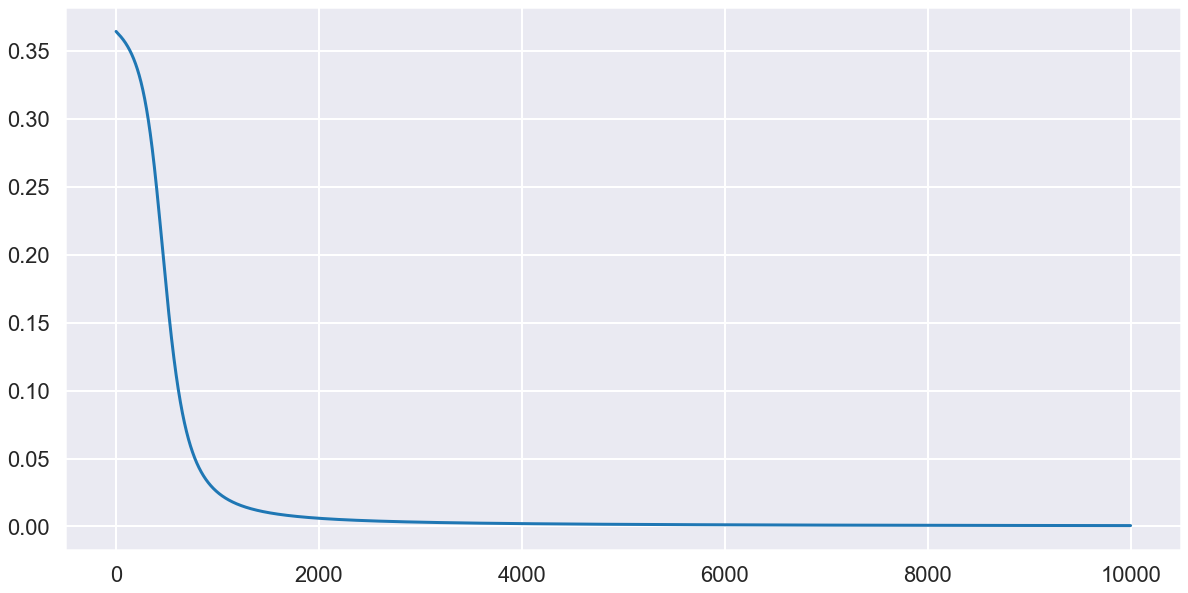

In [7]:
_ = plt.plot(mlp.losses)